## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "compressorPyCalor",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Control Volumes",
    "lecture_reference": {
        "lecture_id": "1_hb7swztw",
        "subtopics": [
            {
              "key": "Fa25-L5b-3.0",
              "title": "Example: Energy Analysis of a Steady-flow System: Compressor",
            }
        ]
    },
    "book_reference": {
              "chapter_number": 5,
              "title": "Mass and Energy Analysis of Control Volumes",
        "sections": [
            "Some Steady-Flow Engineering Devices",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
Air enters a compressor with a mass flow rate of 0.02 kg/s at 100 kPa and 290 K and exits the compressor at 600 kPa and 500 K. The compressor is cooled with 1 kJ/kg. 

**Goal**: 
* Determine the shaft power input.

## 2. Schematic
Draw a compressor with a control volume drawn around it. Indicate that power is transferred in from a shaft and heat is transferred out. 

## 3. Assumptions and Approximations
* **Control Volume** (mass crosses the boundary).
* **Ideal Gas Model** (Justification: Air at these conditions behaves as an ideal gas, $p v = R T$)
* **Neglect changes in kinetic and potential energy** ($\Delta KE\approx0$, $\Delta PE\approx0$). (Justification: The velocities are typically low, or the change in height is negligible compared to the enthalpy change.)
* **Steady-flow process** ($\Delta~m_\text{CV}=0$, $\Delta~E_\text{CV}= 0$, $\Delta~S_\text{CV}=0$).
* **Properties**: Determine properties using `pyCalor`. 
* **Enthalpy/Internal Energy Change**: Changes in enthalpy can be determined via $dh = c_p dT$. (This is a consequence of the ideal gas model.)
* **Constant Specific Heats** ($c_p$, $c_v=\text{const}$). (Justification: The specific heat property changes are negligible over the process temperature range, simplifying the calculation of $\Delta h$ to $c_p~\Delta T$.
* We have a single inlet and outlet ($\dot{m}_\text{in}$ and $\dot{m}_\text{out}$).

## 4. Physical Laws and Governing Equations
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$

Since this is a steady flow process, we can write:
$$\dot{E}_\text{in} = \dot{E}_\text{out}$$

$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

We can then write for a compressor:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_1 + \frac{w_1^2}{2} + g z_1 \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_2 + \frac{w_1^2}{2} + g z_2 \right)$$

Neglecting changes in kinetic and potential energy:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} h_1  = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} h_2 $$

Since the compressor operates isentropically, we can assume that it is adiabatic:
$$\dot{W}_\text{in} + \dot{m} h_1  = \dot{W}_\text{out} + \dot{m} h_2 $$

There is only work transferred into the compressor, not out. Therefore:
$$\dot{W}_\text{in} = \dot{m} \left(h_2 - h_1 \right)$$

Assuming air behaves as an ideal gas, we can write:
$$\dot{W}_\text{in} \approx \dot{m} c_p \left(T_2 - T_1 \right) $$

In [1]:
## 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

#For the properties, I am using the notation "in" and "out" as well as "1" and "2", where "in" is also "1" and "out" is also "2"

fluid = 'Air'

mdot_kgperS = 0.02 #kg/s

# state 1
P1_Pa = 100e3 #Pa
T1_K = 290 #K
st1 = th.state(fluid,T=(T1_K,'K'),p=(P1_Pa,'Pa'),name='1')
h1_JperKg = st1.h*1e3
cp_kJperKgPerK = st1.cp

# state 2
P2_Pa = 600e3 #Pa
T2_K = 500 #K
st2 = th.state(fluid,T=(T2_K,'K'),p=(P2_Pa,'Pa'),name='2')
h2_JperKg = st2.h*1e3

qout_JperKg = 1e3 #J/kg

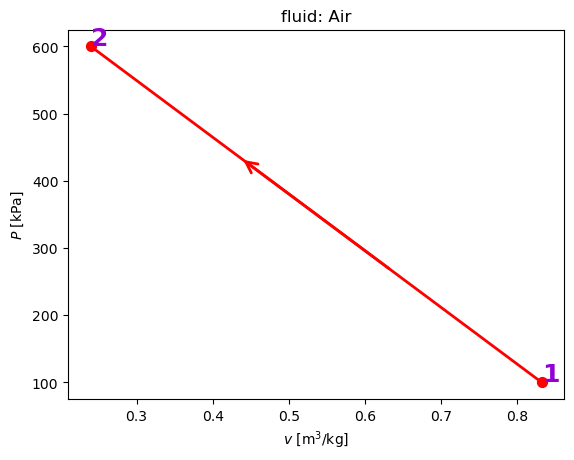

WdotIn_JperS= 4278.032995931938
WdotIn_JperS_alt= 4245.318177469188
error= 0.7647163659994816


In [4]:
## 6 Calculations (Code Cell)
pr = th.process([(st1,st2)])
pr.plot('pv')
QdotOut_JperS = qout_JperKg*mdot_kgperS #J/s
WdotIn_JperS = QdotOut_JperS + mdot_kgperS*(h2_JperKg-h1_JperKg); print("WdotIn_JperS=",WdotIn_JperS) #J/s

### Alternative solution
WdotIn_JperS_alt = QdotOut_JperS + mdot_kgperS*(cp_kJperKgPerK*1e3)*(T2_K-T1_K); print("WdotIn_JperS_alt=",WdotIn_JperS_alt) #J/s
error = ((WdotIn_JperS - WdotIn_JperS_alt)/WdotIn_JperS)*100; print("error=",error)

## 7. Summary and Reasoning
We see that the ideal gas assumption is a good one since the error for determining the power input is less than 1% compared to using thermodynamic properties (pyCalor). 

In [ ]:
THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---